## Tutorial on sampling in a custom design space
_v1.0_

First we import the desired libraries:

In [10]:
from f3dasm.src.designofexperiments import DoE
from f3dasm.src.space import ContinuousSpace, DiscreteSpace, CategoricalSpace
from f3dasm.sampling.latinhypercube import LatinHypercube
from f3dasm.sampling.randomuniform import RandomUniform
from f3dasm.sampling.sobolsequence import SobolSequencing
from f3dasm.src.data import Data

### Constructing the design space

There are three types of parameters that can be created: continous, discrete and categorical:

* We can create **continous** parameters with a `lower_bound` and `upper_bound` with the `ContinuousSpace` class

In [11]:
x1 = ContinuousSpace('x1', lower_bound=0.0, upper_bound=100.0)
x2 = ContinuousSpace('x2', lower_bound=0.0, upper_bound=4.0)

* We can create **discrete** parameters with a `lower_bound` and `upper_bound` with the `DiscreteSpace` class

In [12]:
x3 = DiscreteSpace('x3', lower_bound=2, upper_bound=4)
x4 = DiscreteSpace('x4', lower_bound=74, upper_bound=99)

* We can create **categorical** parameters with a list of strings (`categories`) with the `CategoricalSpace` class

In [13]:
x5 = CategoricalSpace('x5', categories=['test1','test2','test3','test4'])
x6 = CategoricalSpace('x6', categories=['material1','material2','material3'])

The design space is then constructed by calling the `DoE` class:

In [14]:
design = DoE(input_space=[x1, x2, x3, x4, x5, x6])

### Sampling from the design space

Three samplers are included in this module:
* Latin Hypercube sampling (`LatinHyperCube`)
* Random uniform sampling (`RandomUniform`)
* Sobol sequence sampling (`SobolSequencing`)

We have to feed them the designspace:

In [15]:
lhs = LatinHypercube(doe=design)
ran = RandomUniform(doe=design)
sob = SobolSequencing(doe=design)

We can evoke sampling by calling the `get_samples()` method and providing the number of samples:

In [16]:
N = 100 # Number of samples

data_ran = ran.get_samples(N)
data_lhs = lhs.get_samples(N)
data_sob = sob.get_samples(N)

data_lhs.data

,"(input, x1)","(input, x2)","(input, x3)","(input, x4)","(input, x5)","(input, x6)"
0,93.194484,0.875658,3,82,test2,material1
1,24.902028,2.778395,4,82,test4,material1
2,53.646197,0.249003,3,75,test2,material3
3,84.242488,2.013880,2,92,test3,material1
4,63.970669,1.874727,4,79,test4,material1
...,...,...,...,...,...,...
95,88.540068,2.144485,3,74,test2,material3
96,71.897941,0.764355,4,82,test3,material2
97,85.651424,2.066775,2,95,test1,material1
98,70.840596,0.111967,4,81,test1,material2


#### Storing and displaying sampling in the `Data` structure

Samples are stored as data within the `Data` class:

In [25]:
data_lhs

Data(doe=DoE(input_space=[ContinuousSpace(name='x1', lower_bound=0.0, upper_bound=100.0, type='float'), ContinuousSpace(name='x2', lower_bound=0.0, upper_bound=4.0, type='float'), DiscreteSpace(name='x3', lower_bound=2, upper_bound=4, type='int'), DiscreteSpace(name='x4', lower_bound=74, upper_bound=99, type='int'), CategoricalSpace(name='x5', categories=['test1', 'test2', 'test3', 'test4'], type='category'), CategoricalSpace(name='x6', categories=['material1', 'material2', 'material3'], type='category')], output_space=[]), data=    (input, x1)  (input, x2)  (input, x3)  (input, x4) (input, x5) (input, x6)
0     93.194484     0.875658            3           82       test2   material1
1     24.902028     2.778395            4           82       test4   material1
2     53.646197     0.249003            3           75       test2   material3
3     84.242488     2.013880            2           92       test3   material1
4     63.970669     1.874727            4           79       test4   m

Currently, only a 2D plotting function is implemented (`plot()`).
This function requires the two parameter names: 

/home/martin/Documents/GitHub/testthings/f3dasm/src/data.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


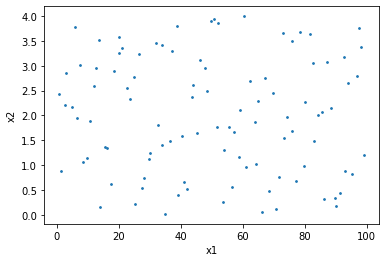

In [17]:
data_lhs.plot(input_par1='x1',input_par2='x2')

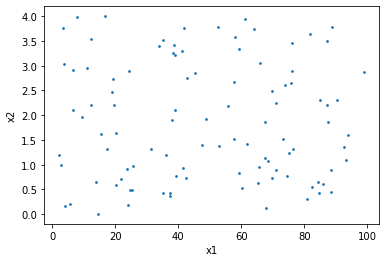

In [18]:
data_ran.plot(input_par1='x1',input_par2='x2')

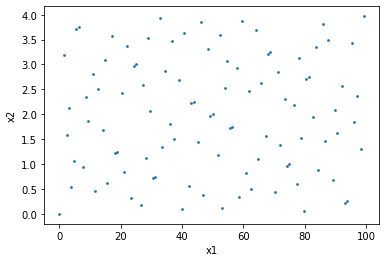

In [19]:
data_sob.plot(input_par1='x1',input_par2='x2')

Categorical or discrete parameters can also be plotted:

/home/martin/Documents/GitHub/testthings/f3dasm/src/data.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


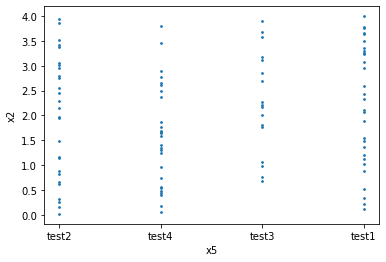

In [20]:
data_lhs.plot(input_par1='x5',input_par2='x2')